# CMSC 197 (Machine Learning) Assignment 2 - Basic Data Processing Using Pandas


Submitted to: Ms. Ara Abigail Ambita<br>
Submitted by: Alyssa Alexandra Lee

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# %matplotlib inline

In [30]:
data = pd.read_csv("data/movie_metadata_cleaned.csv")

In [32]:
data.head(2)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0


## Get the top 10 directors with most movies directed and use a boxplot for their gross earnings

In [33]:
#Count the number of times the certain director's name show up and get the first 10 directors in the list with most movies directed
top10_directors = data['director_name'].value_counts()[:11]
#For printing the names of the top 10 directors together with the number of movies that they have directed
print("The top 10 directors based on the number of movies that they have directed are:\n")
director_name, movie_count = top10_directors.index, top10_directors.values
for x in range(1, 11):
    print("Top {}: {} with {} movies directed".format(x, director_name[x], movie_count[x]))

The top 10 directors based on the number of movies that they have directed are:

Top 1: Steven Spielberg with 26 movies directed
Top 2: Woody Allen with 22 movies directed
Top 3: Martin Scorsese with 20 movies directed
Top 4: Clint Eastwood with 20 movies directed
Top 5: Ridley Scott with 17 movies directed
Top 6: Tim Burton with 16 movies directed
Top 7: Steven Soderbergh with 16 movies directed
Top 8: Spike Lee with 16 movies directed
Top 9: Renny Harlin with 15 movies directed
Top 10: Oliver Stone with 14 movies directed


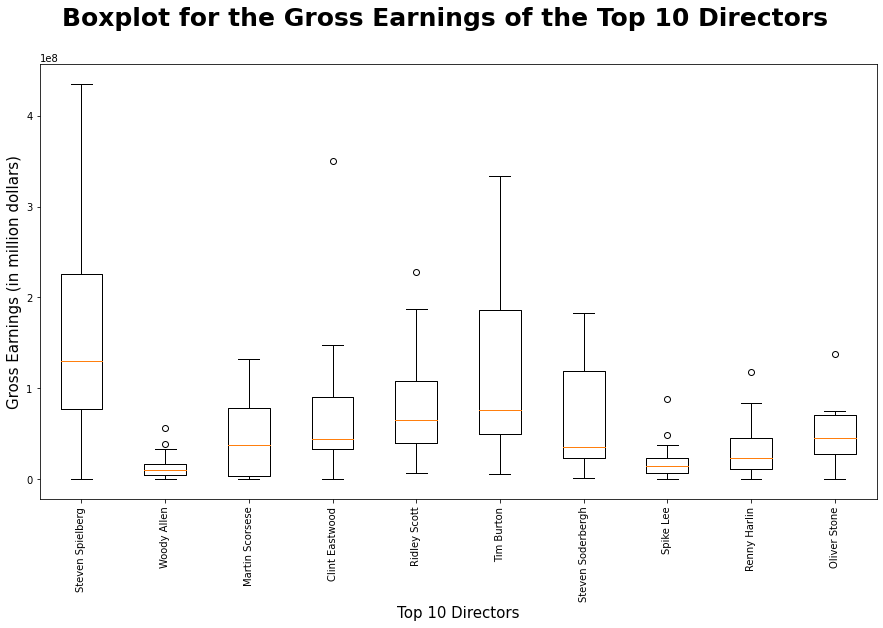

In [34]:
gross_earnings = []
for x in range(1, 11):
    gross_earnings.append(data[data["director_name"] == director_name[x]]["gross"].values)
#Size of the plot
fig = plt.figure(figsize=(15,8))
#Create boxplot for their gross earnings
plt.boxplot(gross_earnings)
fig.suptitle("Boxplot for the Gross Earnings of the Top 10 Directors",fontweight='bold', fontsize=25)
plt.xlabel('Top 10 Directors', fontsize=15), plt.ylabel('Gross Earnings (in million dollars)', fontsize=15)
#Place the names of the directors on the x-axis
plt.xticks(range(1, 11), director_name[1:11], rotation=90)
plt.show()

## Plot the following variables in one graph:

- num_critic_for_reviews
- IMDB score
- gross

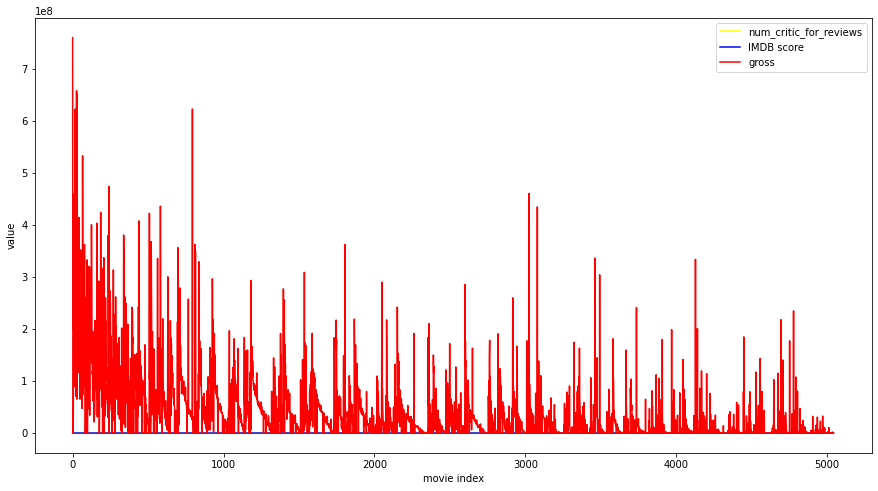

In [35]:
#Plotting these 3 variables in a graph
fig = plt.figure(figsize=(15,8))
plt.xlabel("movie index")
plt.ylabel("value")
plt.plot(data["num_critic_for_reviews"], color="yellow", label="num_critic_for_reviews")
plt.plot(data["imdb_score"], color="blue", label="IMDB score")
plt.plot(data["gross"], color="red", label="gross")
plt.legend()
plt.show()

## Compute Sales (Gross - Budget), add it as another column

In [36]:
#Compute for the sales using the formula Gross-Budget and add it as a new column
data["sales"] = data["gross"]-data["budget"]
#Print the data with the new column (Number of columns right now: 30, Before: 29)
data

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0,-44925825.0
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,198130642.0
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0,0,0,0.0,0.0,12.0,7.1,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,5039,b'The Following ',Color,0,43.0,43.0,0.0,319.0,Valorie Curry,841.0,...,English,USA,TV-14,0.0,0.0,593.0,7.5,16.00,32000.0,0.0
5040,5040,b'A Plague So Pleasant',Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,...,English,USA,0,1400.0,2013.0,0.0,6.3,0.00,16.0,-1400.0
5041,5041,b'Shanghai Calling',Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,...,English,USA,PG-13,0.0,2012.0,719.0,6.3,2.35,660.0,10443.0
5042,5042,b'My Date with Drew',Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,...,English,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456.0,84122.0


## Which directors garnered the most total sales?

In [37]:
director_list = data['director_name'].unique()
df = pd.DataFrame.from_dict({director: data[data['director_name'] == director]['sales'].sum() for director in director_list}, orient='index', columns=['totalsales'])
df = df.sort_values(by='totalsales', ascending=False)
print("The Top 10 Directors ranked with the most total sales are:\n")
director_name, sales_count = df.index, df.values
for x in range(10):
    print("Top {}: {} with total sales of ${}".format(x+1, director_name[x], int(sales_count[x])))

The Top 10 Directors ranked with the most total sales are:

Top 1: Steven Spielberg with total sales of $2451332231
Top 2: George Lucas with total sales of $1386641480
Top 3: James Cameron with total sales of $1199625910
Top 4: Joss Whedon with total sales of $1000886628
Top 5: Chris Columbus with total sales of $941707624
Top 6: Peter Jackson with total sales of $900969279
Top 7: Tim Burton with total sales of $824275480
Top 8: Christopher Nolan with total sales of $808227576
Top 9: Jon Favreau with total sales of $769381547
Top 10: Francis Lawrence with total sales of $755501971


## Plot sales and average likes as a scatterplot. Fit it with a line.

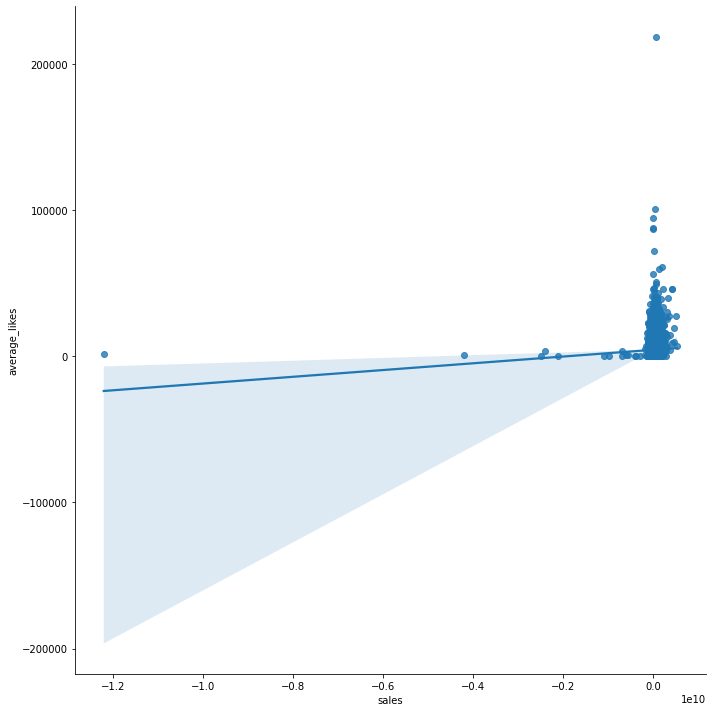

In [39]:
#data.filter(regex = 'like') is for knowing which rows contain the likes for every movie
#mean(axis=1) is for computing each row's mean
data['average_likes'] = data.filter(regex = 'like').mean(axis=1)
#lmplot() of Seaborn draws a scatterplot w/ regression on sales and average_likes
sns.lmplot(x = 'sales', y = 'average_likes', data=data, height=10)
plt.show()

## Which of these genres are the most profitable? Plot their sales using different histograms, superimposed in the same axis.

- Romance
- Comedy
- Action
- Fantasy

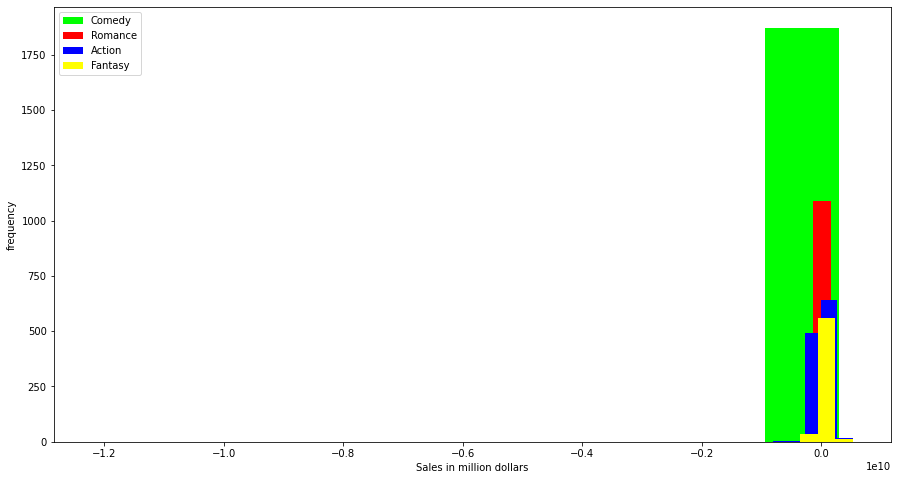

In [40]:
fig = plt.figure(figsize=(15,8))
plt.xlabel('Sales in million dollars')
plt.ylabel('frequency')
plt.hist(data[data['genres'].str.contains('Comedy')]["sales"], color="lime", label="Comedy")
plt.hist(data[data['genres'].str.contains('Romance')]["sales"], color="red", label="Romance")
plt.hist(data[data['genres'].str.contains('Action')]["sales"], color="blue", label="Action")
plt.hist(data[data['genres'].str.contains('Fantasy')]["sales"], color="yellow", label="Fantasy")
plt.legend()
plt.show()

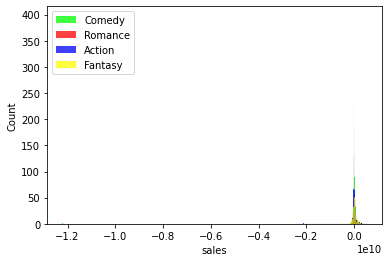

In [41]:
#We can also make histograms utilizing the Seaborn library 
ax = sns.histplot(data[data['genres'].str.contains('Comedy')], x='sales', color='lime', label='Comedy')
sns.histplot(data[data['genres'].str.contains('Romance')], x='sales', color='red', label='Romance', ax=ax)
sns.histplot(data[data['genres'].str.contains('Action')], x='sales', color='blue', label='Action', ax=ax)
sns.histplot(data[data['genres'].str.contains('Fantasy')], x='sales', color='yellow', label='Fantasy', ax=ax)
ax.legend()

Based on the histograms, the genre that is most profitable is **Comedy**.

## For each of movie, compute average likes of the three actors and store it as a new variable

Read up on the mean function.

Store it as a new column, average_actor_likes.

In [42]:
#There is .mean(axis=1) at the end so we can get the mean of the facebook likes of different actors along rows
data['average_actor_likes'] = data[['actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes']].mean(axis=1)
#Show these data
data[['actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes', 'average_actor_likes']]

,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,average_actor_likes
0,1000.0,936.0,855.0,930.333333
1,40000.0,5000.0,1000.0,15333.333333
2,11000.0,393.0,161.0,3851.333333
3,27000.0,23000.0,23000.0,24333.333333
4,131.0,12.0,0.0,47.666667
...,...,...,...,...
5039,841.0,593.0,319.0,584.333333
5040,0.0,0.0,0.0,0.000000
5041,946.0,719.0,489.0,718.000000
5042,86.0,23.0,16.0,41.666667


## Copying the whole dataframe

In [43]:
df = data.copy()
df.head()

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,average_likes,average_actor_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0,6770.833333,930.333333
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0,15818.833333,15333.333333
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0,-44925825.0,18042.333333,3851.333333
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,198130642.0,60959.833333,24333.333333
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0,0.0,0.0,12.0,7.1,0.00,0.0,0.0,69.500000,47.666667


## Min-Max Normalization 

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges.

The min-max approach (often called normalization) rescales the feature to a hard and fast range of [0,1] by subtracting the minimum value of the feature then dividing by the range. We can apply the min-max scaling in Pandas using the .min() and .max() methods.

$$ 
x_{scaled} = \frac{x-x_{min}}{x_{max}-x_{min}}
$$

### Normalize each numeric column (those that have types integer or float) of the copied dataframe (df)

In [45]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
for column in numeric_columns:
    #Utilizing the min-max normalization formula to normalize the data
    df[column] = ((df[column] - df[column].min()) / (df[column].max() - df[column].min()))
#Show data with already normalized numeric columns
df[numeric_columns]

,Unnamed: 0,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,average_likes,average_actor_likes
0,0.000000,0.889299,0.941799,0.000000,0.037174,0.001563,1.000000,0.524454,0.007361,0.000000,0.603557,1.940158e-02,0.996528,0.006832,0.831579,0.111250,0.094556,1.000000,0.030964,0.004261
1,0.000198,0.371464,0.894180,0.024478,0.043478,0.062500,0.406840,0.278867,0.073622,0.000000,0.244664,2.455896e-02,0.995536,0.036496,0.747368,0.146875,0.000000,0.959637,0.072341,0.070229
2,0.000397,0.740467,0.783069,0.000000,0.007000,0.017188,0.263080,0.163258,0.017816,0.023256,0.196443,2.005649e-02,0.999504,0.002869,0.715789,0.146875,0.243553,0.955371,0.082510,0.017640
3,0.000595,1.000000,0.867725,0.956522,1.000000,0.042188,0.589253,0.677217,0.162561,0.000000,0.533794,2.046580e-02,0.998016,0.167883,0.894737,0.146875,0.469914,0.974454,0.278777,0.111450
4,0.000793,0.000000,0.000000,0.005696,0.000000,0.000205,0.000000,0.000005,0.000218,0.000000,0.000000,0.000000e+00,0.000000,0.000088,0.747368,0.000000,0.000000,0.958898,0.000318,0.000218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,0.999207,0.052891,0.227513,0.000000,0.013870,0.001314,0.000000,0.043698,0.002669,0.023256,0.070949,0.000000e+00,0.000000,0.004328,0.789474,1.000000,0.091691,0.958898,0.027062,0.002676
5040,0.999405,0.015990,0.402116,0.000000,0.000000,0.000000,0.000000,0.000022,0.000000,0.000000,0.000593,1.146085e-07,0.998512,0.000000,0.663158,0.000000,0.000046,0.958898,0.000012,0.000000
5041,0.999603,0.017220,0.529101,0.000000,0.021261,0.001478,0.000014,0.000743,0.003633,0.116279,0.001779,0.000000e+00,0.998016,0.005248,0.663158,0.146875,0.001891,0.958899,0.003963,0.003289
5042,0.999802,0.052891,0.476190,0.000696,0.000696,0.000134,0.000112,0.002536,0.000248,0.000000,0.016601,9.004953e-08,0.994048,0.000168,0.694737,0.115625,0.001307,0.958905,0.000579,0.000191
